# Squeezed Vacuum State from Optical Parametric Oscillation (OPO) 


Author: Theng-Loo Lim, email address: stanleyloo14@gmail.com 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import dag, destroy, wigner, liouvillian, lindblad_dissipator, steadystate

## Introduction 

In this notebook, we discuss squeezed vacuum state generations through a nonlinear optical process called an optical parametric oscillation (OPO). This process occurs as a nonlinear crystal is installed inside an optical cavity (see the figure below). The cavity resonates with the output photons, leading to an efficient parametric amplification of the output photons. The physical interpretation can be understood as follows: as the incident light known as the pump is fed into the OPO, the crystal down-converts a pump photon of a frequency of $𝜔_{𝑝}$ into two output photons known as signal and idler with frequencies $𝜔_{𝑠𝑖𝑔𝑛𝑎𝑙}$ and $𝜔_{𝑖𝑑𝑙𝑒𝑟}$, respectively. 

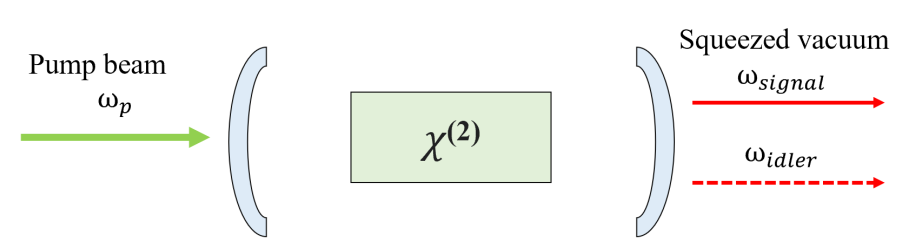

To demonstrate that OPO can be used to a squeezed vacuum state, we show the master equation that describes OPO can be written as [1-3]:

$\frac{d \hat{\rho}}{d t}=\left[\hat{H}_{OPO}, \hat{\rho}\right]+\frac{\kappa}{2} D_{\hat{a}}[\hat{\rho}]+\frac{\kappa_{2 \mathrm{p}}}{2} D_{\hat{a}^{2}}[\hat{\rho}]$

 
where $\hat{H}_{OPO}$ is the hamiltonian from OPO:  $ \hat{H}_{OPO} = \frac{p_{s}}{4}((\hat{a}^{\dagger})^{2}-\hat{a}^{2})$, $p_s$ is the  driving amplitude of a laser field, $\kappa$ and $\kappa_{2}$ are one-photon losses and two-photon losses, respectively. The Hamiltonian describes how input photon is annihilated and converted into signal and idler photons. The notation $ \mathcal{D}_{J}[\hat{\rho}]=2 \hat{J} \hat{\rho} \hat{J}^{\dagger}-\hat{J}^{\dagger} \hat{J} \hat{\rho}-\hat{\rho} \hat{J}^{\dagger} \hat{J}$ is referred as Lindblad dissipator. The second term of the equation describes the loss of photons in an optical cavity due to the imperfection of the mirrors. Thus $\kappa$ is proportional to mirror transmittance [1]. The last term of the equation explains how photon pairs are lost due to the upconversion of the nonlinear crystal, and $\kappa_{2}$ is proportional to the second-order nonlinear susceptibility of the crystal. 





### Setting up OPO hamiltonian parameters

In [2]:
# Defining the parameters
kp= 0.02 # We assumed that mirror is highly reflective
k2p= 0.005 # We assumed that the two-photon losses are ~5 times weaker than the one-photon losses 

### Defining operators, hamiltonian and Liouvillian superoperator

In [3]:
N= 70
a= destroy(N) #Annihilation operator 

# Here we determine the steady state solution of this system using built-in function from Qutip
# We first define the hamiltonian of the system, and the Lindblad dissipators 
def calculate_rho_ss(ps):
    H= 1.0j*(ps/4)*(a.dag()**2-(a**2)) 
    L0= liouvillian(H)  
    L1= kp*lindblad_dissipator(a)  
    L2= k2p*lindblad_dissipator(a**2) 
    LT= L0+L1+L2 
    return steadystate(LT) 

### Simulating the coresponding Wigner functions of OPO with different driving amplitudes

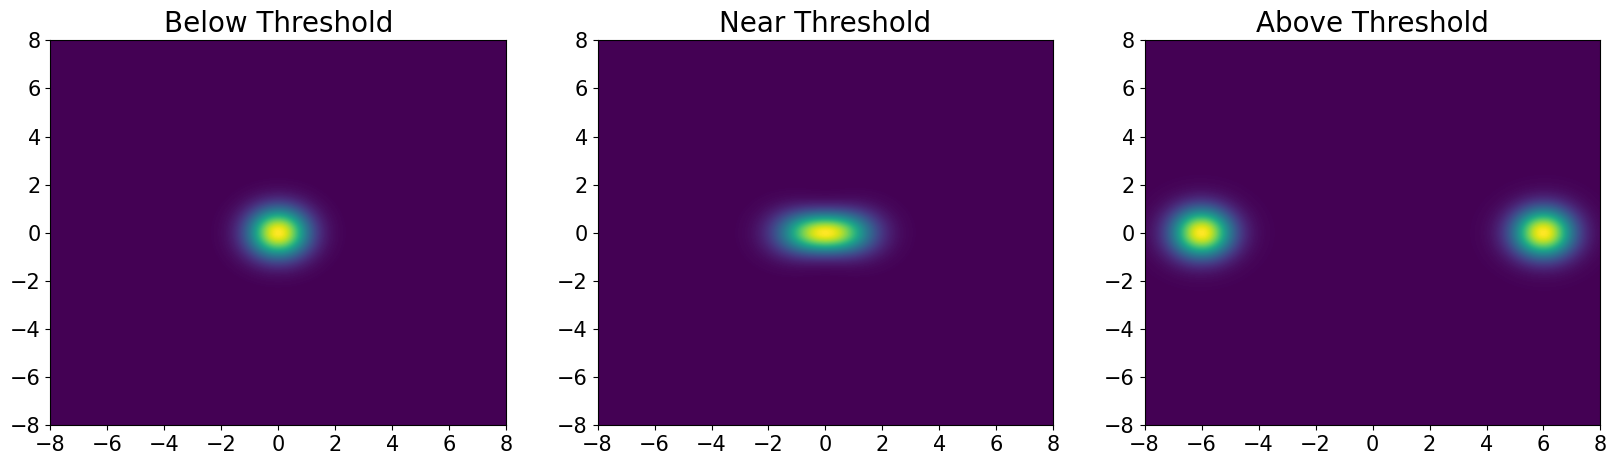

In [4]:
#Defining Wigner parameters
xvec= np.linspace(-8, 8, 500)

# Plotting results with three different driving amplitudes, p_s
plt.subplots(1, 3, figsize=(20, 5))

# p_s below OPO threshold
plt.subplot(1, 3, 1)
W_OPO= wigner(calculate_rho_ss(0.001), xvec, xvec)
cont0= plt.contourf(xvec, xvec, W_OPO, 500)
plt.title('Below Threshold', fontsize= 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

# p_s near OPO threshold
plt.subplot(1, 3, 2)
W_OPO= wigner(calculate_rho_ss(0.015), xvec, xvec)
cont0= plt.contourf(xvec, xvec, W_OPO, 500)
plt.title('Near Threshold', fontsize= 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

# p_s above OPO threshold
plt.subplot(1, 3, 3)
W_OPO=wigner(calculate_rho_ss(0.2), xvec, xvec)
cont0=plt.contourf(xvec, xvec, W_OPO, 500)
plt.title('Above Threshold', fontsize= 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

#Plotting the Wigner functions
plt.show()

Observing the corresponding Wigner functions of OPO, the system remains in a vacuum state when $p_s$ is significantly lower than the OPO threshold. However, we observe squeezed vacuum state generated from OPO as the driving field approaches the OPO threshold. When $p_s$ is above the threshold, the squeezed vacuum state degraded into a mixture of two coherent states, which are classical [1,3]. Hence, an OPO-based squeezed vacuum generation is limited by the OPO power threshold. 

### Reference

[1] Benito, Mónica, Carlos Sánchez Munoz, and Carlos Navarrete-Benlloch. "Degenerate parametric oscillation in quantum membrane optomechanics." Physical Review A 93.2 (2016): 023846.

[2] Kinsler, Paul, and Peter D. Drummond. "Quantum dynamics of the parametric oscillator." Physical Review A 43.11 (1991): 6194.

[3] Muñoz, Carlos Sánchez, and Dieter Jaksch. "Squeezed lasing." Physical Review Letters 127.18 (2021): 183603.

### Software versions

In [5]:
from qutip.ipynbtools import version_table; version_table()

Software,Version
QuTiP,4.7.1
Numpy,1.21.5
SciPy,1.9.1
matplotlib,3.5.2
Cython,0.29.32
Number of CPUs,6
BLAS Info,INTEL MKL
IPython,7.31.1
Python,"3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]"
OS,nt [win32]
